<a href="https://colab.research.google.com/github/tanujazig/sparks-/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The below code leads to the working of the decison tree which classifies different species of iris flower on the basis of their physical characterstics .

# Importing the required libraries




In [5]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder


# Loading the iris dataset
iris=pd.read_csv('Iris (1).csv')

# Forming the iris dataframe (No changes needed here since 'iris' is already a DataFrame)
df = iris.drop('Id', axis=1)  # Assuming 'Id' is a column you want to exclude
print(df.head(5))

y = iris['Species']  # Assuming 'Species' is your target variable column
print(y)


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


# Defining the decision tree algoritham

In [6]:
# Encode the 'Species' column to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
# Fit the model with the encoded target variable
dtree.fit(df.drop('Species', axis=1), y_encoded)  # Exclude 'Species' from features

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


# Visualising the decision tree

In [7]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


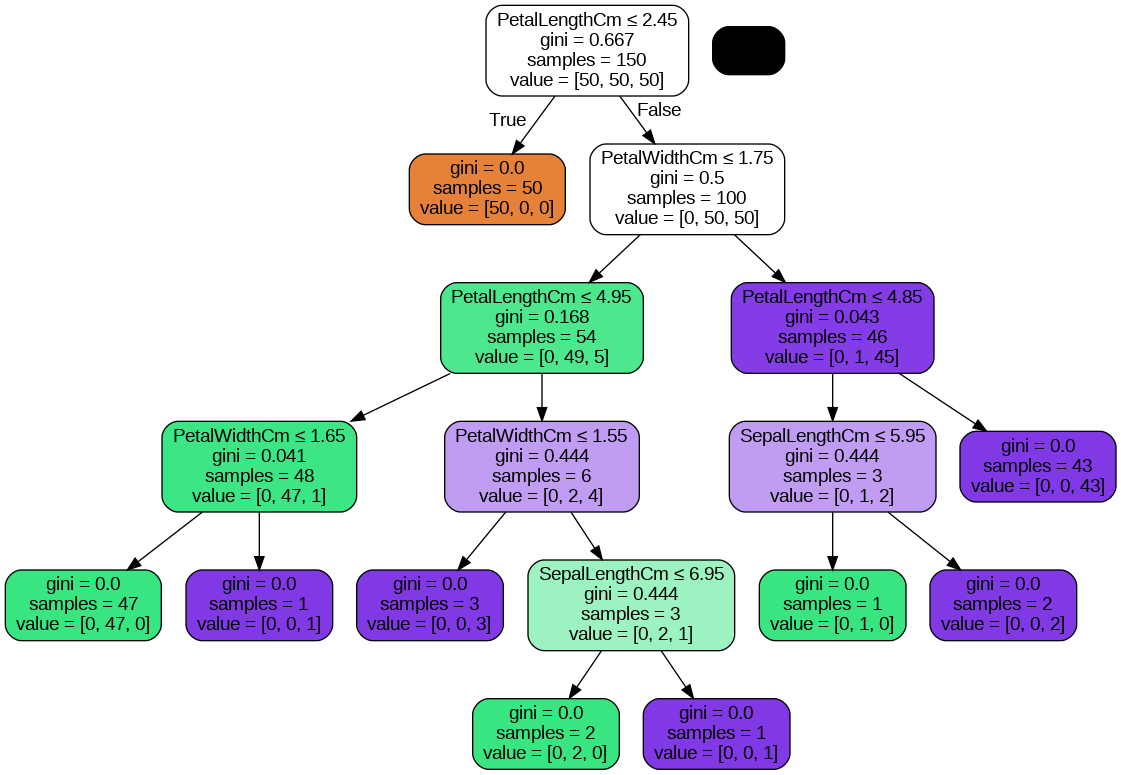

In [11]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Assuming 'df' contains the feature names as column headers
feature_names = df.drop('Species', axis=1).columns

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=feature_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

This decision tree helps us identify the species of an Iris flower. It starts by checking the petal length. If the petal is short, it's likely a Setosa Iris. If the petal is longer, it then checks the petal width and so on. By following the branches of the tree, we can arrive at a prediction for the Iris species.